Проверить мощность и консервативность критериев для проверки нормальности Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределний:

Нормальное
Лапласа
Стьюдента
Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [32]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings("ignore")

In [2]:
samples_n = 100 #number of samples
volume_n = 350 #sample's volume

Случайная генерация выборок:

In [3]:
def gen_distr(a):
    if a == 1:
        return st.distributions.norm(0, 1).rvs(size=volume_n)
    if a == 2:
        return st.distributions.laplace.rvs(loc = 0, scale = 1, size=volume_n)
    if a == 3:
        return st.distributions.t.rvs(df = 2, size=volume_n)
    if a == 4:
        return st.distributions.truncnorm.rvs(a = -2, b = 2, size=volume_n)

In [4]:
d = np.zeros(samples_n)

mass = np.zeros((volume_n , samples_n))

for k in range(samples_n):
    d[k] = np.random.randint(1, 5)
    mass[:, k]  = gen_distr(d[k])

Распределение по классам сгенерированных выборок:

(array([25.,  0.,  0., 24.,  0.,  0., 29.,  0.,  0., 22.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

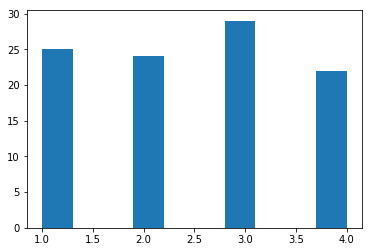

In [12]:
#1 - norm, 2 - laplace, 3 - student, 4 - truncnorm
plt.hist(d)

Проверим критерии на консервативность. Также оценим мощность критериев

In [13]:
predict = np.zeros((3, np.shape(mass)[1]))

for k in range(np.shape(mass)[1]):
    predict[2, k] = st.shapiro(mass[:, k])[1]
    predict[1, k] = st.jarque_bera(mass[:, k])[1]
    predict[0, k] = kstest_normal(mass[:, k], dist='norm', pvalmethod='approx')[1]

In [14]:
rejected_l = d[multipletests(predict[0, :], alpha = 0.05, method='fdr_bh')[0]]
rejected_j = d[multipletests(predict[1, :], alpha = 0.05, method='fdr_bh')[0]]
rejected_s = d[multipletests(predict[2, :], alpha = 0.05, method='fdr_bh')[0]]

In [15]:
print(rejected_l)
print(rejected_j)
print(rejected_s)

[3. 2. 3. 3. 3. 3. 2. 3. 3. 3. 2. 3. 2. 3. 2. 2. 3. 4. 2. 3. 2. 3. 4. 3.
 2. 3. 2. 2. 2. 3. 2. 1. 2. 2. 3. 2. 3. 2. 3. 2. 3. 3. 2. 2. 2. 3. 2. 3.
 3. 3. 3. 2. 2. 3. 3. 3.]
[4. 3. 2. 3. 3. 3. 3. 2. 3. 3. 3. 2. 3. 2. 3. 2. 2. 3. 2. 3. 2. 3. 4. 3.
 2. 3. 2. 2. 2. 3. 2. 2. 2. 3. 2. 3. 2. 3. 2. 3. 3. 2. 2. 2. 3. 2. 3. 3.
 3. 3. 2. 2. 3. 3. 3.]
[4. 4. 3. 2. 4. 4. 3. 3. 3. 3. 2. 3. 3. 4. 3. 2. 3. 2. 4. 4. 3. 2. 2. 3.
 4. 4. 2. 3. 2. 4. 4. 3. 4. 3. 2. 3. 2. 2. 2. 3. 2. 1. 2. 2. 3. 2. 4. 3.
 2. 4. 4. 3. 2. 3. 3. 2. 2. 2. 3. 4. 2. 3. 3. 4. 4. 3. 3. 2. 4. 2. 3. 4.
 3. 3.]


In [16]:
w_l = np.sum([rejected_l != 1])/np.sum([d != 1])
w_j = np.sum([rejected_j != 1])/np.sum([d != 1])
w_s = np.sum([rejected_s != 1])/np.sum([d != 1])

alpha_l = np.sum([rejected_l == 1])/np.sum([d == 1])
alpha_j = np.sum([rejected_j == 1])/np.sum([d == 1])
alpha_s = np.sum([rejected_s == 1])/np.sum([d == 1])

In [17]:
print('Оценка мощности критериев:')
print('Лиллиефорс: ', w_l)
print('Харке-Бера: ', w_j)
print('Шапиро-Уилка: ', w_s)
print('\n')
print('Оценка вероятности отвергнуть гипотезу H_0 при ее истинности:')
print('Лиллиефорс: ', alpha_l)
print('Харке-Бера: ', alpha_j)
print('Шапиро-Уилка: ', alpha_s)

Оценка мощности критериев:
Лиллиефорс:  0.7333333333333333
Харке-Бера:  0.7333333333333333
Шапиро-Уилка:  0.9733333333333334


Оценка вероятности отвергнуть гипотезу H_0 при ее истинности:
Лиллиефорс:  0.04
Харке-Бера:  0.0
Шапиро-Уилка:  0.04


Подойдем к результатам как к случайной величине с распределением $Ber(p)$. С помощью биномиального теста проверим, не превышает ли значение $p$ пороговое значение $\alpha$ ($H_0$), или же можно говорить об отсутствии консервативности критериев?

In [18]:
print('Лиллиефорс: ', st.binom_test(np.sum([rejected_l == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater'))
print('Харке-Бера: ', st.binom_test(np.sum([rejected_j == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater'))
print('Шапиро-Уилка: ', st.binom_test(np.sum([rejected_s == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater'))

Лиллиефорс:  0.7226104268781662
Харке-Бера:  1.0
Шапиро-Уилка:  0.7226104268781662


Как мы видим, биномиальный тест показывает достаточно высокое значение $pvalue$, поэтому об отвержении гипотезы о консервативности говорить не приходится (хотя Лиллиефорс не особо далек от границы). Можно продолжить изучение, проделав большее количество итераций (генераций).



Усредненная оценка вероятности отвергнуть гипотезу H_0 при ее верности:
Лиллиефорс:  0.025751513614335905
Харке-Бера:  0.03586410552627783
Шапиро-Уилка:  0.0339948017024182


Максимальная достигаемая ошибка 1 рода:
Лиллиефорс:  0.11538461538461539
Харке-Бера:  0.15789473684210525
Шапиро-Уилка:  0.15789473684210525


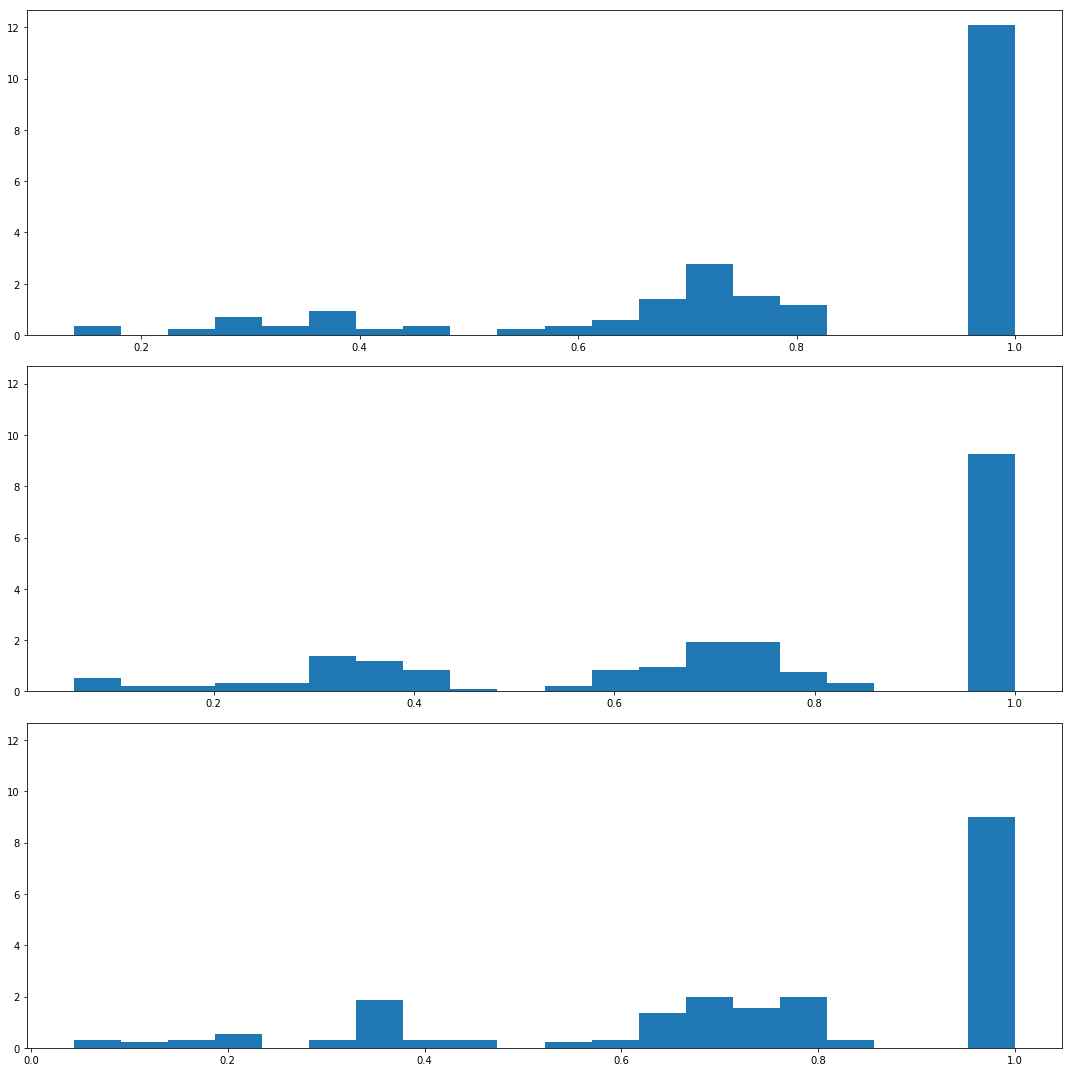

In [34]:
#Запускать, только если есть время/ желание
iters = 200

alpha_l_max = 0.0
alpha_j_max = 0.0
alpha_s_max = 0.0

alpha_l = 0.0
alpha_j = 0.0
alpha_s = 0.0

p_l = np.zeros(iters)
p_j = np.zeros(iters)
p_s = np.zeros(iters)

for j in range(iters):
    d = np.zeros(samples_n)
    mass = np.zeros((volume_n , samples_n))

    for k in range(samples_n):
        d[k] = np.random.randint(1, 5)
        mass[:, k]  = gen_distr(d[k])
        
    predict = np.zeros((3, np.shape(mass)[1]))

    for k in range(np.shape(mass)[1]):
        predict[2, k] = st.shapiro(mass[:, k])[1]
        predict[1, k] = st.jarque_bera(mass[:, k])[1]
        predict[0, k] = kstest_normal(mass[:, k], dist='norm', pvalmethod='approx')[1]
        
    rejected_l = d[multipletests(predict[0, :], alpha = 0.05, method='fdr_bh')[0]]
    rejected_j = d[multipletests(predict[1, :], alpha = 0.05, method='fdr_bh')[0]]
    rejected_s = d[multipletests(predict[2, :], alpha = 0.05, method='fdr_bh')[0]]
    
    p_l[j] = st.binom_test(np.sum([rejected_l == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater')
    p_j[j] = st.binom_test(np.sum([rejected_j == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater')
    p_s[j] = st.binom_test(np.sum([rejected_s == 1]), np.sum([d == 1]), p = 0.05, alternative = 'greater')
    
    alpha_l_current = np.sum([rejected_l == 1])/np.sum(d[d == 1])
    alpha_j_current = np.sum([rejected_j == 1])/np.sum(d[d == 1])
    alpha_s_current = np.sum([rejected_s == 1])/np.sum(d[d == 1])
    
    alpha_l_max = max(alpha_l_max, alpha_l_current)
    alpha_j_max = max(alpha_j_max, alpha_j_current)
    alpha_s_max = max(alpha_s_max, alpha_s_current)
    
    alpha_l += alpha_l_current
    alpha_j += alpha_j_current
    alpha_s += alpha_s_current
    


fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(15,15))
axs[0].hist(p_l, bins = 20, label = 'Лиллиефорс', normed = True)
axs[1].hist(p_j, bins = 20, label = 'Харке-Бера', normed = True)
axs[2].hist(p_s, bins = 20, label = 'Шапиро-Уилка', normed = True)

print('\n')

print('Усредненная оценка вероятности отвергнуть гипотезу H_0 при ее верности:')
print('Лиллиефорс: ', alpha_l/iters)
print('Харке-Бера: ', alpha_j/iters)
print('Шапиро-Уилка: ', alpha_s/iters)

print('\n')

print('Максимальная достигаемая ошибка 1 рода:')
print('Лиллиефорс: ', alpha_l_max)
print('Харке-Бера: ', alpha_j_max)
print('Шапиро-Уилка: ', alpha_s_max)

Как мы видим, большая часть результатов расположена правее $p-value = 0.4$. Несмотря на то, что есть единичные случаи, когда $p-value$ опускается ниже малого уровня значимости (напр, 0.05) , можно утверждать о консервативности данных критериев. Малость выпадения таких случаев хорошо показывает эмперическая функция распределения.

(array([0.01 , 0.02 , 0.055, 0.09 , 0.105, 0.145, 0.19 , 0.22 , 0.25 ,
        0.265, 0.275, 0.295, 0.335, 0.435, 0.555, 0.655, 0.665, 0.665,
        0.665, 1.   ]),
 array([0.01590153, 0.06510645, 0.11431137, 0.1635163 , 0.21272122,
        0.26192614, 0.31113107, 0.36033599, 0.40954092, 0.45874584,
        0.50795076, 0.55715569, 0.60636061, 0.65556553, 0.70477046,
        0.75397538, 0.80318031, 0.85238523, 0.90159015, 0.95079508,
        1.        ]),
 <a list of 20 Patch objects>)

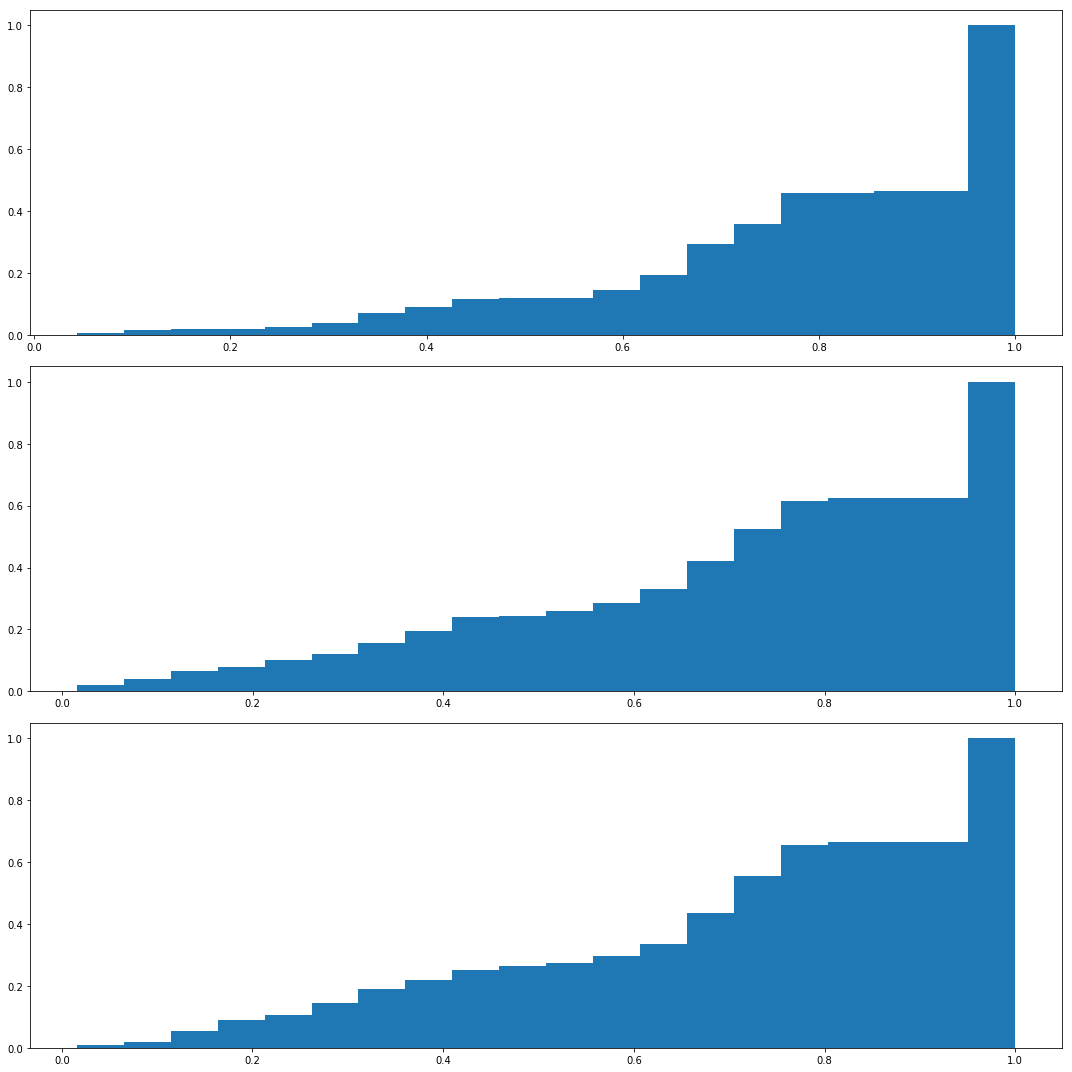

In [33]:
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(15,15))
axs[0].hist(p_l, bins = 20, label = 'Лиллиефорс', normed = True, cumulative = True)
axs[1].hist(p_j, bins = 20, label = 'Харке-Бера', normed = True, cumulative = True)
axs[2].hist(p_s, bins = 20, label = 'Шапиро-Уилка', normed = True, cumulative = True)

Хотя, если говорить строго, то в малом количестве случаев все же консервативность критериев отвергается биномиальным тестом (другое дело, что лишь наша догадка использовать биномиальный тест в данном контексте).